In [55]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection and preprocessing

In [3]:
#load the data
insurance_dataset = pd.read_csv('/content/drive/MyDrive/Data Science/Projects/11 Medical Insurance Cost Prediction/insurance.csv')
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#Number of rows and cols
insurance_dataset.shape

(1338, 7)

In [7]:
#some info
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
Sex,
Smoker,
Region

In [9]:
#check null values
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [11]:
#statistical measures of the dataset, it wont give for categorical values
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/tmp/ipython-input-2231992393.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


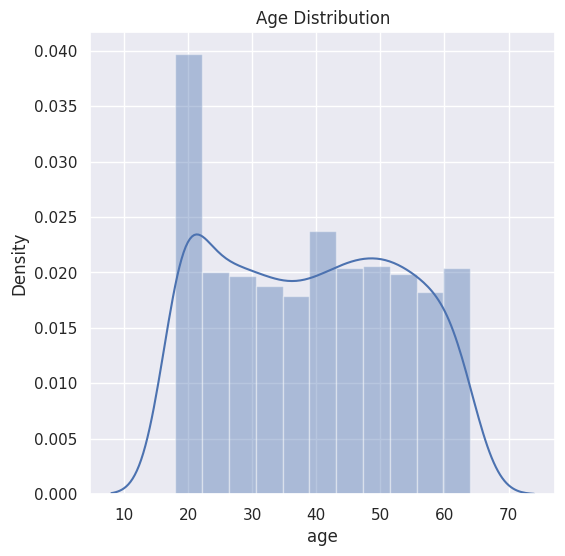

In [18]:
#distribution of age values
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

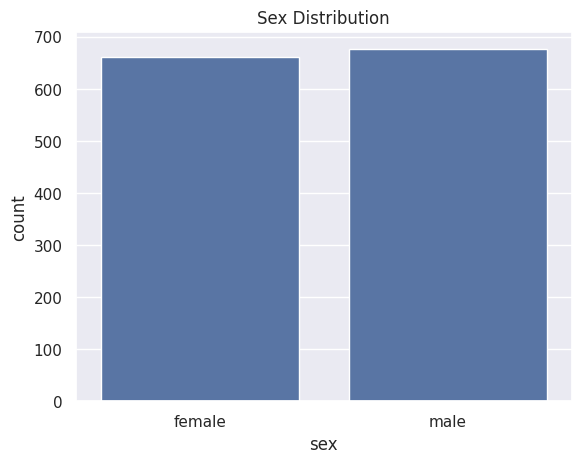

In [25]:
#sex column
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [27]:
insurance_dataset['sex'].value_counts()

,count
sex,
male,676
female,662


/tmp/ipython-input-2334258267.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


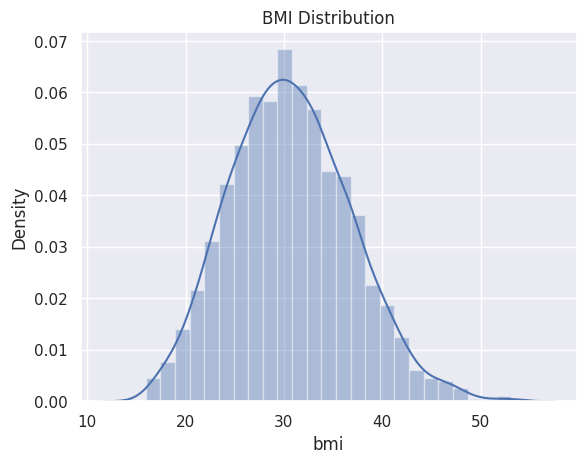

In [30]:
#bmi column
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI range is 18.5 to 24.9


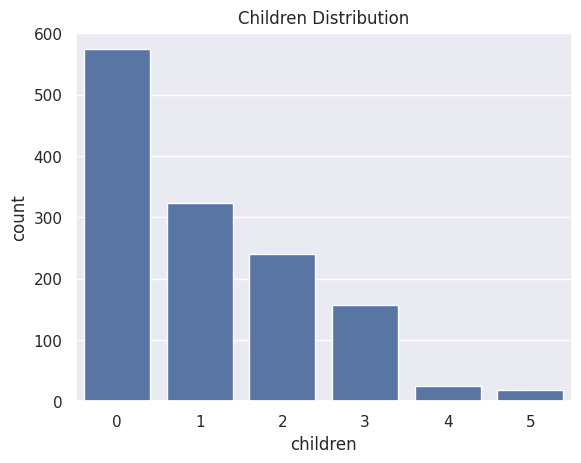

In [34]:
#for children column
sns.countplot(x = 'children', data=insurance_dataset)
plt.title('Children Distribution')
plt.show()

In [36]:
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


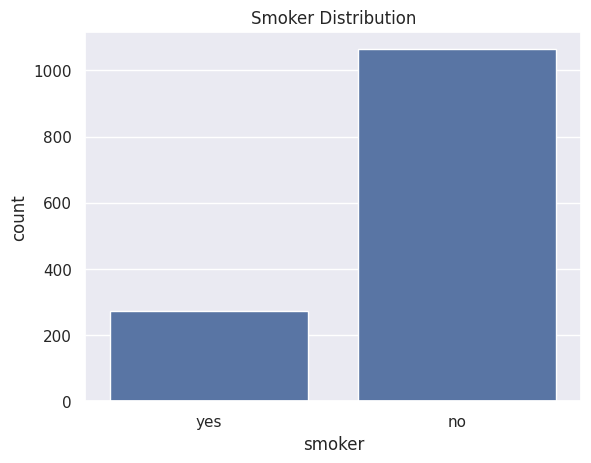

In [37]:
#for smoker column
sns.countplot(x = 'smoker', data=insurance_dataset)
plt.title('Smoker Distribution')
plt.show()

In [38]:
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


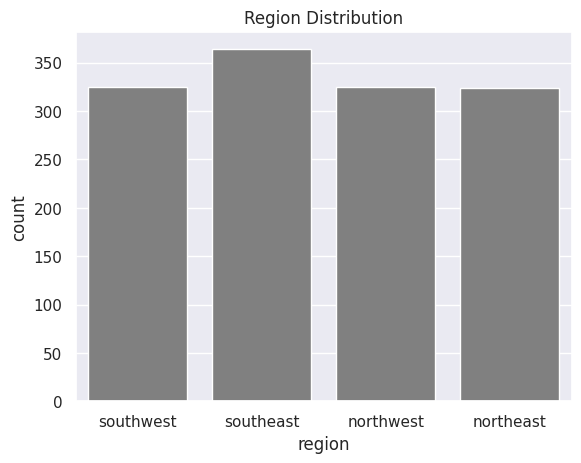

In [42]:
#for region
sns.countplot(x='region', data=insurance_dataset, color='grey')
plt.title('Region Distribution')
plt.show()

/tmp/ipython-input-1152711758.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


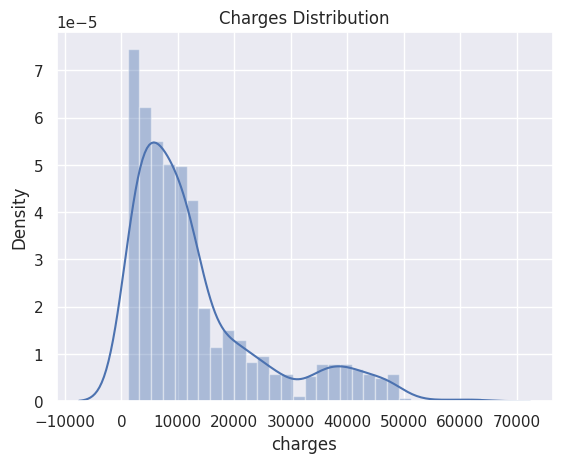

In [43]:
#for the charges column
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()


Data Pre-processing

Encoding for sex, smoker, region

In [45]:
#Change categorical to numerical values
#Encoding all column
insurance_dataset.replace({
    'sex': {'male':0, 'female':1},
    'smoker': {'yes': 0, 'no':1},
    'region': {'southeast':0, 'southwest': 1, 'northeast': 2, 'northwest': 3}
}, inplace=True)

/tmp/ipython-input-1187647825.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({


In [46]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Splitting the Features and Targets

In [49]:
x = insurance_dataset.drop(['charges'], axis=1)
y = insurance_dataset['charges']

Train test split now


In [52]:
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1338, 6), (1070, 6), (268, 6), (1070,), (268,))

Model training

In [56]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

Model Evaluation

In [58]:
#prediction of training data
training_data_prediction = regressor.predict(x_train)

In [62]:
#R squared value for training data
r2_train = metrics.r2_score(y_train, training_data_prediction)
r2_train*100

75.1505643411174

In [66]:
#prediction of test data
test_data_prediction = regressor.predict(x_test)

In [67]:
#R squared value for test data
r2_test = metrics.r2_score(y_test, test_data_prediction)
r2_test*100

74.47273869684075

Building a Predictive system

In [79]:
input_data = x_test.iloc[2].values.reshape(1, -1)

prediction = regressor.predict(input_data)
prediction

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10082.43849883])